### Animal Crossing New Horizons: Villager Popularity Rankings Analysis

I'll be combining a dataset on villagers in Animal Crossing New Horizons (ACNH) with villager popularity data from August 2020 to July 2022. The aim is to uncover patterns in popularity over time and link the popularity of villagers to  characteristics such as species, gender, personality and hobby. 

The popularity data is compiled monthly at https://www.animalcrossingportal.com/tier-lists/new-horizons/all-villagers as follows: 
* Respondents vote on who is/are their favorite villager(s) and <u>are permitted to choose up to five villagers</u> per vote. <br> <br>
* The total number of votes for each villager are counted. 

For each monthly poll, I'll assign ranks to villagers based on the number of votes they received as a measure of popularity. I'll then aggregate these rankings to gain insights into populatity over the 24 month time period. 

In [1]:
# load packages 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import pandas as pd 
import scipy as st 
from test import * 

In [2]:
# import and preview data
df = pd.read_csv('~/Desktop/kaggle/acnh/villagers.csv')
df.head()

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE


In [3]:
# print a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             391 non-null    object
 1   Species          391 non-null    object
 2   Gender           391 non-null    object
 3   Personality      391 non-null    object
 4   Hobby            391 non-null    object
 5   Birthday         391 non-null    object
 6   Catchphrase      391 non-null    object
 7   Favorite Song    391 non-null    object
 8   Style 1          391 non-null    object
 9   Style 2          391 non-null    object
 10  Color 1          391 non-null    object
 11  Color 2          391 non-null    object
 12  Wallpaper        391 non-null    object
 13  Flooring         391 non-null    object
 14  Furniture List   391 non-null    object
 15  Filename         391 non-null    object
 16  Unique Entry ID  391 non-null    object
dtypes: object(17)
memory usage: 52.1+ K

The dataset has 391 rows and 17 columns. Also there are no missing values in any of the columns, all columns have the object dtype and the features are all categorical. I'm only interested in exploring popularity with respect to the name, species, 
gender, personality and hobby of villagers, hence I'll take the corresponding subset of the data. 

In [4]:
# only keep name, species, gender, personality and hobby of each villager
df = df.loc[:, ['Name', 'Species', 'Gender', 'Personality', 'Hobby']]
df

,Name,Species,Gender,Personality,Hobby
0,Admiral,Bird,Male,Cranky,Nature
1,Agent S,Squirrel,Female,Peppy,Fitness
2,Agnes,Pig,Female,Big Sister,Play
3,Al,Gorilla,Male,Lazy,Fitness
4,Alfonso,Alligator,Male,Lazy,Play
...,...,...,...,...,...
386,Winnie,Horse,Female,Peppy,Fashion
387,Wolfgang,Wolf,Male,Cranky,Education
388,Yuka,Koala,Female,Snooty,Fashion
389,Zell,Deer,Male,Smug,Music


### Part I: Initial Analysis 

Before I combine the villager and popularity data, let's first see how the data is structured with respect to the features. 

* How many different species of villager are there? How many villagers are of each species? 

* Repeat the above question for gender, personality and hobby. 

#### (a) Species

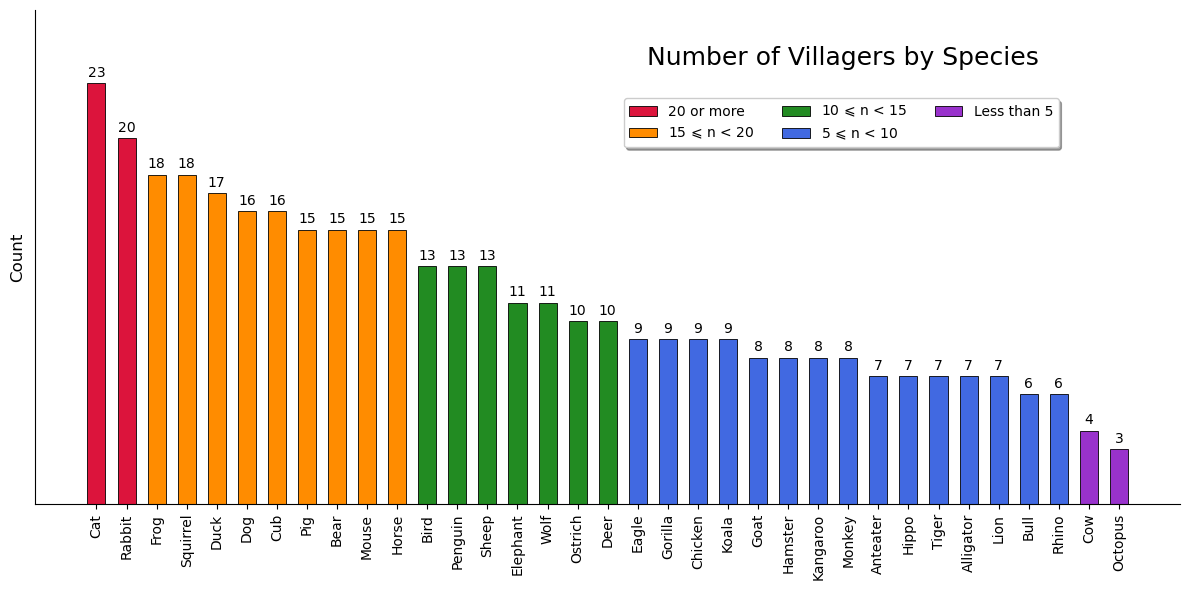

In [5]:
# create a bar chart to visualise species counts

species = df['Species'].value_counts()
from matplotlib.patches import Patch
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(species.index, species, width=0.6, edgecolor='black', linewidth=0.6)
ax.set_facecolor('white')
ax.set_ylabel('Count', loc='center', rotation=90, fontsize=12)
ax.set_xticks(range(species.shape[0]))
ax.set_xticklabels(species.index, rotation=90)
ax.set_yticks([])
for ii in range(species.shape[0]): 
    ax.annotate(f'{species[ii]}', (ii, species[ii]+0.35), ha='center')
bars[0].set_facecolor('crimson')
bars[1].set_facecolor('crimson')
for ii in range(2, 11): 
    bars[ii].set_facecolor('darkorange')
for ii in range(11, 18): 
    bars[ii].set_facecolor('forestgreen')
for ii in range(18, 33): 
    bars[ii].set_facecolor('royalblue')
for ii in range(33, 35): 
    bars[ii].set_facecolor('darkorchid')
ax.set_ylim((0, 27))
ax.annotate('Number of Villagers by Species', (18.3, 24), fontsize=18)
ax.legend(handles=[Patch(facecolor=x, edgecolor='black', lw=0.6) for x in ['crimson', 'darkorange', 'forestgreen', 'royalblue', 'darkorchid']], 
labels=['20 or more', r'15 $\leqslant$ n < 20', r'10 $\leqslant$ n < 15', r'5 $\leqslant$ n < 10', 'Less than 5'], ncol=3, loc='upper right', 
bbox_to_anchor=(0.9, 0.835), facecolor='white', frameon=True, shadow=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

#### (b) Gender and Personality

In [6]:
# create a contingency table to count gender and personality 
cont_tab(df, 'Gender', 'Personality')

Personality:,Big Sister,Cranky,Jock,Lazy,Normal,Peppy,Smug,Snooty,Total
Gender:,,,,,,,,,
Female,24,0,0,0,59,49,0,55,187
Male,0,55,55,60,0,0,34,0,204
Total,24,55,55,60,59,49,34,55,391


#### (c) Gender and Hobby

In [7]:
# create a contingency table to count gender and personality 
cont_tab(df, 'Gender', 'Hobby')

Hobby:,Education,Fashion,Fitness,Music,Nature,Play,Total
Gender:,,,,,,,
Female,32,66,12,34,27,16,187
Male,32,0,54,30,39,49,204
Total,64,66,66,64,66,65,391


#### Summary of Part I: 

* How many different species of villager are there? How many villagers are of each species? 
    * There are 35 unique species of villager. The five most common species were Cats (23), Rabbits (20), Frogs (18), Squirrels (18) and Ducks (17). The two rarest species were Cows (4) and Octopus (3). <br><br>
    
* Repeat the above question for gender, personality and hobbies. 
    * There are eight personality types: Big Sister (24), Cranky (55), Jock (55), Lazy (60), Normal (59), Peppy (49), Smug (34) and Snooty (55). Also, personalities are gender-specific. Big Sister, Normal, Peppy and Snooty are female traits whereas Cranky, Jock, Lazy and Smug are male traits. 

    * There are 204 male villagers and 187 female villagers.  

    * There are six hobbies: Education (64), Fashion (66), Fitness (66), Music (64), Nature (66) and Play (65). 


### Part II: Popularity Analysis

Now to import the popularity data and merge it with the villager dataset. Over the two years since ACNH was released, a few villagers have been introduced as downloadable content (DLC). These DLC villagers are included in the popularity data, however the villager dataset only contains information for the 391 villagers introduced at game release. 

Since I don't have data on the DLC villagers I'll have to scrub through and remove them from the popularity data.

In [8]:
# a list of months specifying range of popularity data 
months = pd.date_range('2020-08','2022-08', freq='M').strftime("%Y-%b").tolist()

# create a dictionary for storing monthly popularity data 
polls = {}
for ii in range(len(months)): 
    
    # import popularity data for each month from Aug. 2020 - Jul. 2022
    # villager name stored in 'Villagers' and total no. of votes in 'Tally' 
    data = pd.read_csv(f'~/Desktop/kaggle/acnh popularity poll data/{months[ii]}.csv')
    data = data[data['Tally'] >= 0] # only take rows with entries in cells  

    # each item of dictionary is an array containing monthly poll data
    # each row contains villager name and number of votes for that month
    polls[months[ii]] = data.loc[:, ['Villagers', 'Tally']] 
    
    # create a list to store names of DLC villagers 
    excluded = [] 
    for i in range(data.shape[0]): 
        if data['Villagers'][i] not in df['Name'].tolist(): # condition to identify DLC villagers 
            excluded.append(data['Villagers'][i]) # append DLC name to list 

    excluded.sort() 
    idxs = []
    for j in excluded: 
        idxs.append(data[data['Villagers'] == j].index[0]) # get index of DLC villagers 
    
    # remove DLC villager rows from popularity data 
    polls[months[ii]].drop(idxs, inplace=True) 

    # assign ranks to villagers based on no. of votes and 
    # ties are given the average rank for their tied group
    polls[months[ii]]['Rank'] = 392 - polls[months[ii]]['Tally'].rank(method='average') 

    # sort columns alphabetically by name of villager 
    # to align popularity data correctly with original dataset
    polls[months[ii]].sort_values('Villagers', inplace=True) 
    polls[months[ii]].reset_index(drop=True, inplace=True)    

    # add rank columns for each month to original dataframe 
    df[f'{months[ii]}'] = polls[months[ii]]['Rank'] 

# villager data is now merged with monthly popularity rankings
df.head()


,Name,Species,Gender,Personality,Hobby,2020-Aug,2020-Sep,2020-Oct,2020-Nov,2020-Dec,...,2021-Oct,2021-Nov,2021-Dec,2022-Jan,2022-Feb,2022-Mar,2022-Apr,2022-May,2022-Jun,2022-Jul
0,Admiral,Bird,Male,Cranky,Nature,182.0,227.0,254.0,220.0,143.5,...,240.0,282.0,298.0,217.0,321.5,302.5,187.5,249.5,300.0,387.0
1,Agent S,Squirrel,Female,Peppy,Fitness,134.0,101.0,133.0,138.0,133.0,...,131.0,102.5,195.5,101.5,287.5,170.0,130.5,211.5,154.0,185.0
2,Agnes,Pig,Female,Big Sister,Play,61.0,70.0,62.0,64.0,60.0,...,50.0,68.0,60.5,51.0,94.5,57.5,64.5,66.5,55.0,63.0
3,Al,Gorilla,Male,Lazy,Fitness,241.0,259.0,243.5,255.5,282.0,...,188.5,259.5,244.0,217.0,253.0,223.5,145.0,336.0,190.5,235.5
4,Alfonso,Alligator,Male,Lazy,Play,117.0,124.0,155.0,180.0,185.0,...,113.0,139.5,153.0,126.5,253.0,153.0,210.5,161.5,190.5,210.5


Now I'll assign each villager an aggregate ranking. A popular choice for defining aggregate rankings is the **geometric mean** of ranks. Other common choices for aggregate rankings are the arithmetic mean or median.

The geometric mean of a list $[x_{1}, \ldots, x_{n}]$ of $n$ numbers is given by the $n^{th}$ root of their product: $\sqrt[n]{x_{1}\ldots x_{n}}$. I chose the geometric mean rather than the usual arithmetic mean $\frac{1}{n}\sum_{i=1}^{n} x_{i}$ since it's usually more robust to outliers. Also there are only 24 rankings for each villager so the median may not perform well due to the small sample size. 

In [9]:
from scipy.stats.mstats import gmean

def villager_agg_rank(villager_name, agg='geom'):

    # get a list of the 24 ranks for a villager 
    ranks = df[df['Name']==villager_name][months]

    # return arithmetic mean, median or geometric mean of ranks 
    if agg == 'mean': 
        return np.round(np.mean(ranks, axis=1), 0)

    if agg == 'median': 
        return np.round(np.median(ranks, axis=1), 0)

    if agg == 'geom': 
        return np.round(st.mstats.gmean(ranks, axis=1), 0)

# create list for storing aggregated ranks of villagers   
agg_rnks = []

# loop over each villager by name and append their geometric mean (aggregated) rank
for ii in range(df.shape[0]): 
    agg_rnks.append(villager_agg_rank(df['Name'][ii], agg='geom'))

# add aggregated ranks to dataframe
df['AggRank'] = pd.DataFrame(agg_rnks)

# create a copy of dataframe and sort values by geometric mean rank 
z = df.sort_values('AggRank', ascending=True)
z.reset_index(drop=True, inplace=True)
z.drop(months, axis=1, inplace=True)

# show top 15 villagers by aggregated rank 
z.loc[:14, :]


,Name,Species,Gender,Personality,Hobby,AggRank
0,Marshal,Squirrel,Male,Smug,Music,1.0
1,Raymond,Cat,Male,Smug,Nature,2.0
2,Zucker,Octopus,Male,Lazy,Nature,4.0
3,Sherb,Goat,Male,Lazy,Nature,4.0
4,Judy,Cub,Female,Snooty,Music,6.0
5,Stitches,Cub,Male,Lazy,Play,7.0
6,Ankha,Cat,Female,Snooty,Nature,7.0
7,Marina,Octopus,Female,Normal,Music,9.0
8,Fauna,Deer,Female,Normal,Nature,9.0
9,Audie,Wolf,Female,Peppy,Fitness,12.0


Now I can group villagers by features and explore how the aggregated ranks differ between groups. To compare ranks between groups I'll use the arithmetric mean, median or geometric mean of the aggregated ranks and visualise results using violin plots overlayed with scatterplots of the aggregated ranks for each group. 

* For each of species, gender, personality and hobby, which groups were the most popular? Which were least popular? 

#### (a) Species

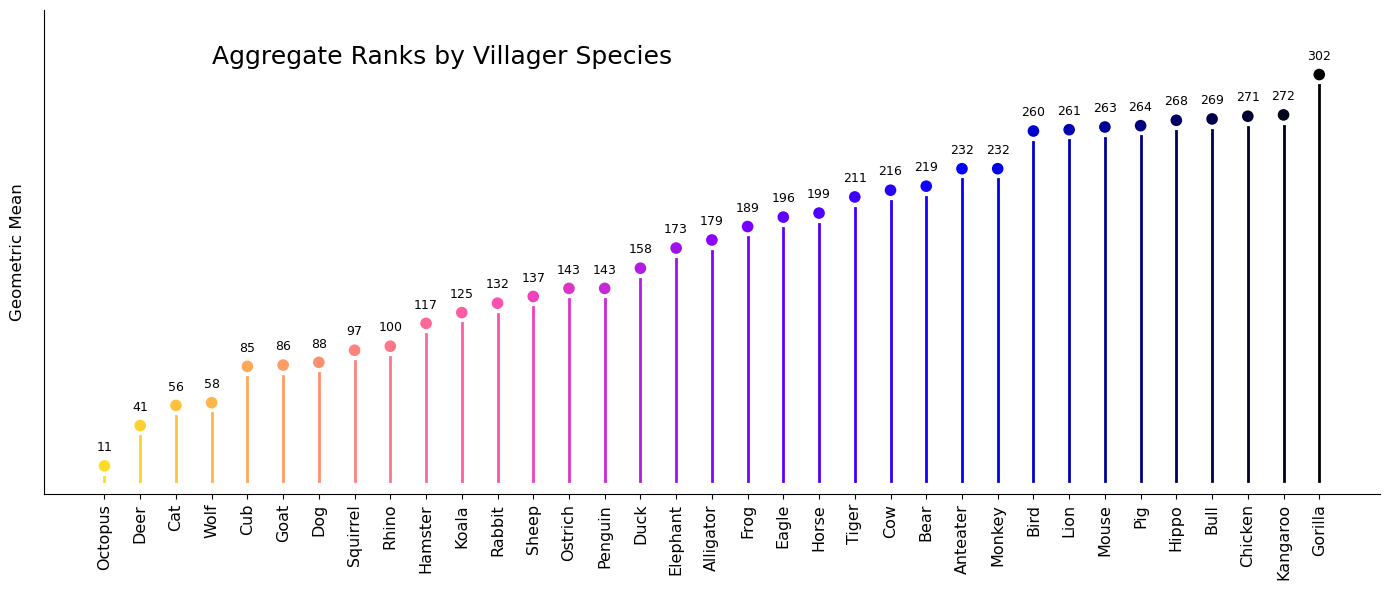

In [10]:
# create lollypop plot of geometric mean of aggregate ranks by species

species_rank = feature_ranks(z, 'Species', 'Geom')
c1 = cm.get_cmap('gnuplot2_r')
colours1 = c1(np.linspace(0.15, 1, 35))

fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter(species_rank.index, species_rank['Rank'], color=colours1, edgecolor='none', s=70, linewidths=0.9)
for ii in range(len(species_rank.index)): 
    ax.plot([ii, ii], [0, species_rank['Rank'][ii]-8], color=colours1[ii], lw=2)
    ax.annotate(f'{int(np.round(species_rank["Rank"][ii], 0))}', (ii, np.rint(species_rank['Rank'][ii])+11), ha='center', fontsize=9, color='k')
ax.annotate('Aggregate Ranks by Villager Species', (3, 310), fontsize=18, color='k')
ax.set_ylabel('Geometric Mean', loc='center', rotation=90, fontsize=12, labelpad=10)
ax.set_xticks(range(species_rank.shape[0]))
ax.set_xticklabels(species_rank.index, rotation=90, fontsize=11.5)
ax.set_yticks([])
ax.set_facecolor('white')
ax.set_ylim((-10, 350))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.show()

#### (b) Hobby

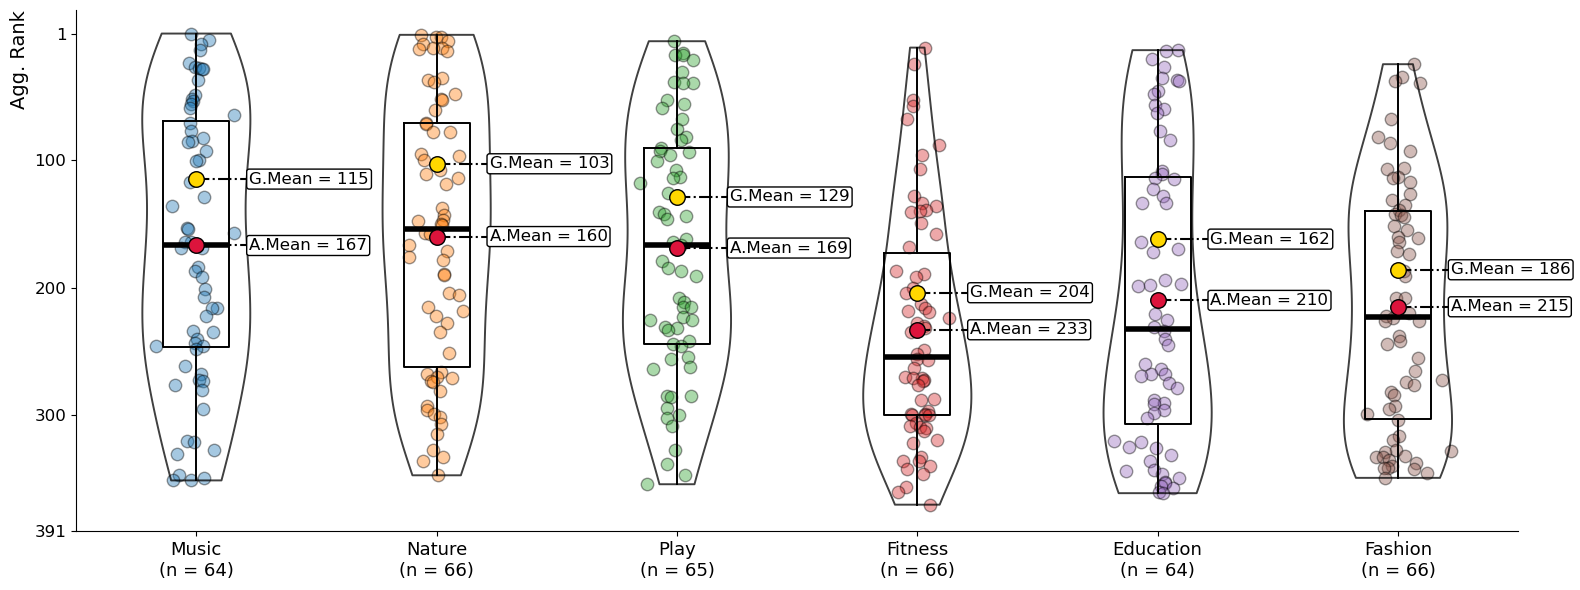

In [11]:
# create violin plot of aggregate ranks by hobbies
c = cm.get_cmap('tab10')
colours = c(np.linspace(0, 1, 10))
compare_group(z, 'Hobby', (16, 6), colours)

#### (c) Gender

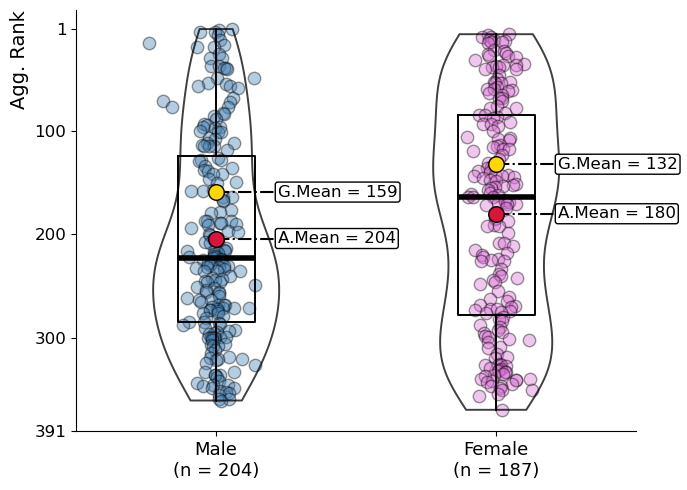

In [12]:
# create violin plot of aggregate ranks by gender 
compare_group(z, 'Gender', (7, 5), colours=['steelblue', 'orchid'])

#### (d) Personality

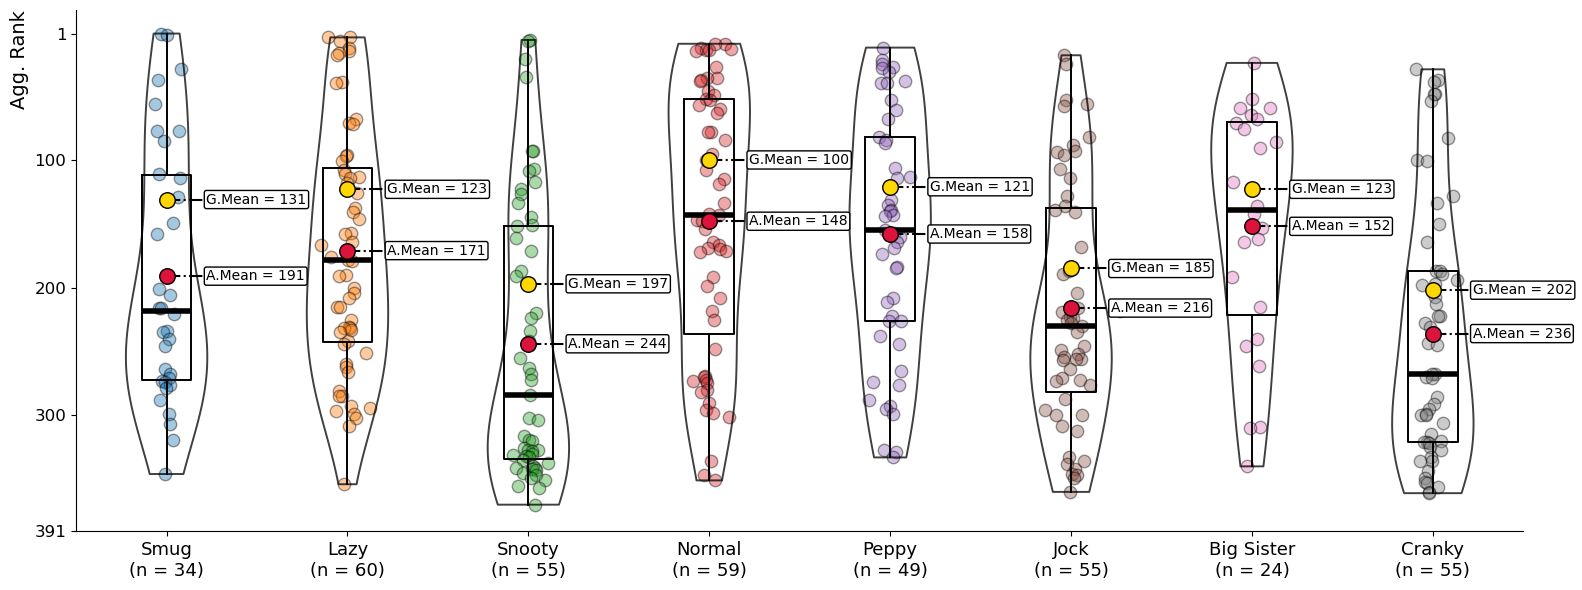

In [13]:
# create a violin plot of aggregated ranks by personality types 
compare_group(z, 'Personality', (16, 6), colours, box_size=10)

#### Summary of Part II: 

* The species with the highest aggregated rank was Octopus (11) but there are only three octopus villagers. Deer (41), Cat (56), Wolf (58) and Cub (85) rounded out the top five. The five species with the lowest geometric mean rank were Gorrila (302), Kangaroo (272), Chicken (271), Bull (269), Hippo (268) and Pig (264).

* From looking at the violin plots, there appears to a disparity in ranks between Music, Nature and Play (tended to be ranked higher), and Fitness, Education and Fashion (tended to be ranked lower) as shown by the kernel density estimates and scatterplots.

    * The arithmetric means, geometric means and medians (solid black lines) of aggregate ranks for the former are all higher than the latter. This implies that villagers whose hobby is either Music, Nature or Play are generally more popular amongst players compared to those who like Fitness, Education or Fashion.  <br><br>

* Females had a slightly higher arithmetic mean, geometric mean and median aggregate rank than males. There were a larger proportion of female villagers between 1 to 200 than males, and a larger proportion of males ranked between 200 to 300.

* Comparing the boxplots and kernel density estimates of personalities, it appears that villagers with the Normal, Peppy, Lazy and Big Sister personality types tended to be more popular than villagers with the Smug, Snooty, Jock or Cranky personalities. 